In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv('cust2_final.csv')
df2=pd.read_csv('cust2.csv')

In [3]:
df.head(15)

,Cust_no,Ec-products,Stationary,fashion_prod,other_shopping,Savings
0,1,0.9,3.010,9.10,11.1,-2.00
1,2,5.5,7.023,0.23,9.5,-9.27
2,3,3.3,3.822,1.92,0.0,1.92
3,4,0.2,3.310,18.20,12.7,5.50
4,5,1.5,2.112,0.10,6.5,-8.38
5,6,1.1,2.550,6.30,7.1,-0.80
6,7,3.3,4.150,0.20,6.8,-8.40
7,8,2.2,4.850,9.50,14.8,-5.30
8,9,0.6,2.500,17.00,1.4,15.60
9,10,0.8,2.175,6.85,6.1,0.75


In [4]:
#Correlation signifies fashion_prod as input feature
print(df.corr())

                 Cust_no  Ec-products  Stationary  fashion_prod  \
Cust_no         1.000000    -0.164817   -0.132287      0.042728   
Ec-products    -0.164817     1.000000    0.820644     -0.499619   
Stationary     -0.132287     0.820644    1.000000      0.017620   
fashion_prod    0.042728    -0.499619    0.017620      1.000000   
other_shopping  0.077182     0.227550    0.542267      0.099285   
Savings        -0.014273    -0.571563   -0.361307      0.720420   

                other_shopping   Savings  
Cust_no               0.077182 -0.014273  
Ec-products           0.227550 -0.571563  
Stationary            0.542267 -0.361307  
fashion_prod          0.099285  0.720420  
other_shopping        1.000000 -0.596222  
Savings              -0.596222  1.000000  


In [5]:
X=sm.add_constant(df['fashion_prod'])
X.head()

,const,fashion_prod
0,1.0,9.10
1,1.0,0.23
2,1.0,1.92
3,1.0,18.20
4,1.0,0.10


In [6]:
Y=df['Savings']

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,train_size = 0.8, random_state = 100)

In [8]:
savings_lm=sm.OLS(train_y,train_X).fit()

In [9]:
print(savings_lm.summary2())
print(savings_lm.params)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.493   
Dependent Variable: Savings          AIC:                185.3329
Date:               2023-11-19 14:34 BIC:                187.9973
No. Observations:   28               Log-Likelihood:     -90.666 
Df Model:           1                F-statistic:        27.25   
Df Residuals:       26               Prob (F-statistic): 1.88e-05
R-squared:          0.512            Scale:              40.952  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
const            -8.3089   1.8697 -4.4441 0.0001 -12.1521 -4.4658
fashion_prod      1.0052   0.1926  5.2197 0.0000   0.6093  1.4010
-----------------------------------------------------------------
Omnibus:              15.070       Durbin-Watson:          2.524 
Prob(Omnibus):        0.001

In [12]:
predicted=savings_lm.predict(X)
print(predicted)

0      0.838040
1     -8.077754
2     -6.379029
3      9.985023
4     -8.208425
5     -1.976416
6     -8.107909
7      1.240106
8      8.778827
9     -1.423576
10    -5.293453
11    -2.881062
12     4.255594
13    -5.745776
14     2.747850
15    -1.071769
16    -4.790872
17     4.959208
18    -6.298616
19    -6.449390
20    -8.007393
21    -7.906877
22    -5.494486
23    -3.685192
24     4.356111
25    -7.002230
26    -4.388806
27     7.874181
28    10.990185
29    11.492767
30    -5.393969
31    -7.705844
32    -5.293453
33    -3.383644
34    -0.669704
dtype: float64


In [11]:
r_square=r2_score(df['Savings'],predicted)
print(r_square)

ValueError: Found input variables with inconsistent numbers of samples: [35, 28]

In [144]:
print(mean_squared_error(df['Savings'],predicted))

32.9381503939378


In [145]:
#Outlier using Z-score
df['zscore_savings']=zscore(predicted)

In [146]:
df[ (df.zscore_savings > 3.0) | (df.zscore_savings < -3.0) ]

,Cust_no,Ec-products,Stationary,fashion_prod,other_shopping,Savings,zscore_savings


Text(0, 0.5, 'Cooks Distance')

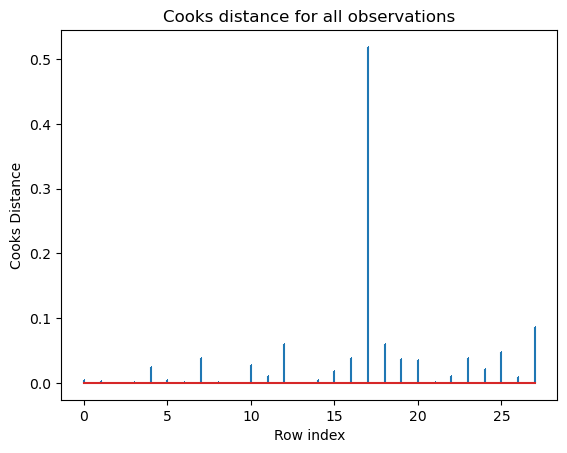

In [147]:
#Cook's Distance
savings_influence = savings_lm.get_influence()
(c, p) = savings_influence.cooks_distance
plt.stem(np.arange( len( train_X) ),np.round( c, 3 ),markerfmt=",")
plt.title("Cooks distance for all observations")
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

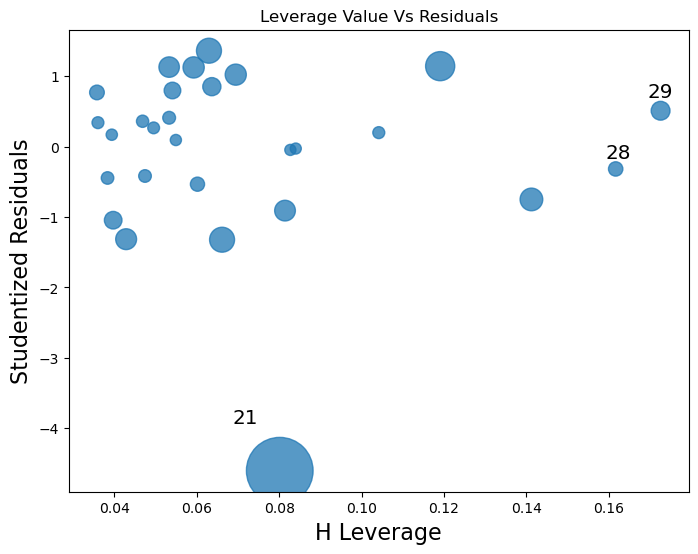

In [148]:
#Leverage Values
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( savings_lm, ax = ax ) 
plt.title("Leverage Value Vs Residuals") 
plt.show()

In [149]:
#3(k+1)/n->0.1714

In [126]:
value_to_remove = 22.5
df2= df2[df2['fashion_prod'] != value_to_remove]
X_new=sm.add_constant(df2['fashion_prod'])

In [127]:
Y_new=df2['Savings']

In [128]:
train_X_new, test_X_new, train_y_new, test_y_new = train_test_split(X_new,Y_new,train_size = 0.8, random_state = 100)

In [129]:
savings_lm_new=sm.OLS(train_y_new,train_X_new).fit()
print(savings_lm.params)
print(savings_lm_new.params)
predicted=savings_lm_new.predict(X_new)

const          -7.982174
fashion_prod    0.994766
dtype: float64
const          -8.563966
fashion_prod    0.991719
dtype: float64


In [130]:
print(savings_lm.summary2())
print(savings_lm_new.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.505   
Dependent Variable: Savings          AIC:                219.6653
Date:               2023-09-15 15:51 BIC:                222.7180
No. Observations:   34               Log-Likelihood:     -107.83 
Df Model:           1                F-statistic:        34.62   
Df Residuals:       32               Prob (F-statistic): 1.52e-06
R-squared:          0.520            Scale:              35.369  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
const            -7.9822   1.5198 -5.2521 0.0000 -11.0779 -4.8865
fashion_prod      0.9948   0.1691  5.8842 0.0000   0.6504  1.3391
-----------------------------------------------------------------
Omnibus:              19.297       Durbin-Watson:          2.539 
Prob(Omnibus):        0.000

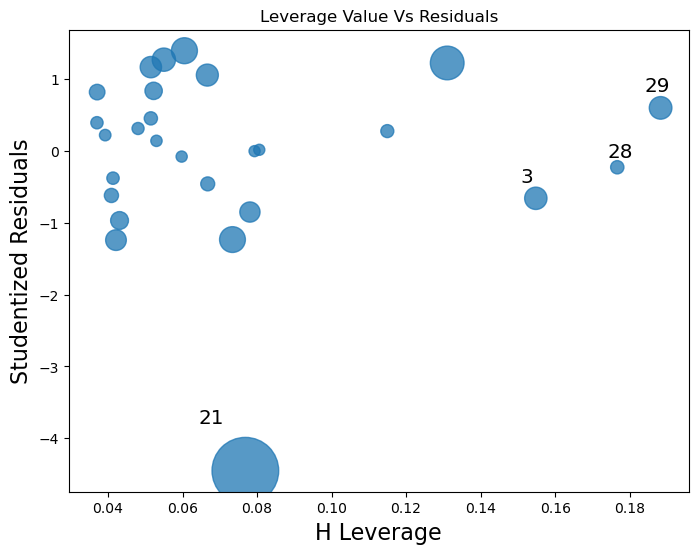

In [131]:
#Leverage Values
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot(savings_lm_new, ax = ax ) 
plt.title("Leverage Value Vs Residuals") 
plt.show()

Text(0, 0.5, 'Cooks Distance')

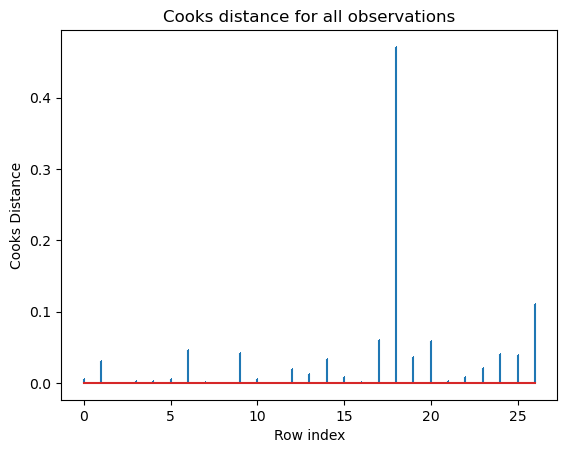

In [132]:
#Cook's Distance
savings_influence_new = savings_lm_new.get_influence()
(c, p) = savings_influence_new.cooks_distance
plt.stem(np.arange( len( train_X_new) ),np.round( c, 3 ),markerfmt=",")
plt.title("Cooks distance for all observations")
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

In [133]:
influence = savings_lm.get_influence()
cooks_distance = influence.cooks_distance[0]

# Calculate leverage distance
leverage = influence.hat_matrix_diag

In [156]:
new_df = pd.DataFrame({'Cooks Distance': cooks_distance, 'Leverage Distance':leverage})
print(new_df)

   Cooks Distance  Leverage Distance
0        0.593354                0.6
1        0.096874                0.3
2        0.071203                0.2
3        0.139499                0.3
4        0.854430                0.6
